In [21]:
import numpy as np

In [22]:
np.random.seed(1000)

In [23]:
s_init = 100.
vol = 0.2
maturity = 1.
r = 0.05

In [24]:
n_disc = 10
n_path = 10

In [ ]:
class CoefFunc(object):
    def __init__(self,)

In [42]:
class PathGen(object):

    def __init__(self,
                 grids, s_init, drift_func, diffusion_func):
        self._grids = grids
        self._s_init = s_init
        self._drift_func = drift_func
        self._diffusion_func = diffusion_func

    def generate(self, n_path, model):
        is_single_output = False
        if type(model) == str:
            is_single_output = True
            model = [model]

        s = {k : np.full(n_path, self._s_init)
             for k in model}
        t_prev = self._grids[0]

        vals = {}
        for k in model:
            vals[k] = []
            vals[k].append(s[k])

        for t in self._grids[1:]:
            d = t - t_prev
            w = np.random.randn(n_path)
            for k in model:
                a = self._drift_func(t, s[k])
                b = self._diffusion_func(t, s[k])
                next = next_dict[k]
                s[k] = next(s[k], a, b, d, w)
                vals[k].append(s[k])
            t_prev = t
        
        ret = {k : np.array(v).T for k, v in vals.items()}
        if is_single_output:
            ret = list(ret.values())[0]
        return ret


def next_euler_maruyama(
    s, a, b, d, w):
    return s + a * d + b * w * np.sqrt(d)


def next_milstein(
    s, a, b, d, w):
    return s + a * d + b * w * np.sqrt(d)


next_dict = {
    'euler_maruyama': next_euler_maruyama,
    'milstein': next_euler_maruyama,
    'analytic': next_euler_maruyama,
}

In [43]:
grids = np.linspace(0., maturity, n_disc)
drift = lambda t, s: r * s
diffusion = lambda t, s: vol * s

In [44]:
path_gen = PathGen(grids, s_init, drift, diffusion)

In [46]:
path_gen.generate(2, 'analytic')

array([[100.        ,  90.85049921,  77.26703017,  79.81790864,
         78.72472645,  82.46226477,  79.11066863,  79.56754583,
         85.11990144,  93.14235569],
       [100.        , 101.21106554, 110.71172139, 115.69453794,
        119.11810431, 113.99137009, 109.47960574, 111.05782727,
        114.52118089, 108.10955161]])

In [45]:
path_gen.generate(5, incr_dict.keys())

{'euler_maruyama': array([[100.        ,  97.80153211,  99.89930842, 113.17079579,
         116.72404803, 117.59028406, 101.12113534, 103.16028147,
         107.19601483, 107.88546203],
        [100.        ,  94.31316418,  87.94469982,  83.56924475,
          90.37292812,  98.5856196 ,  99.1300674 ,  96.83703207,
          95.01301451,  85.94465471],
        [100.        ,  98.74348391,  99.69014121, 103.06192978,
         101.51067169, 105.20524772, 102.09980121, 101.19134818,
         106.72365602, 121.26362625],
        [100.        ,  93.23417207,  96.77636722,  87.20538175,
          91.05806055,  92.9933944 ,  99.01845877, 102.52848745,
          98.66513336, 108.23724165],
        [100.        ,  92.49306854,  99.10777237, 104.71286054,
          98.0955014 ,  94.35036686,  88.66170582,  93.06572894,
          95.91706579,  86.38388892]]),
 'milstein': array([[100.        ,  97.80153211,  99.89930842, 113.17079579,
         116.72404803, 117.59028406, 101.12113534, 103.16028147

In [29]:
import matplotlib.pyplot as plt

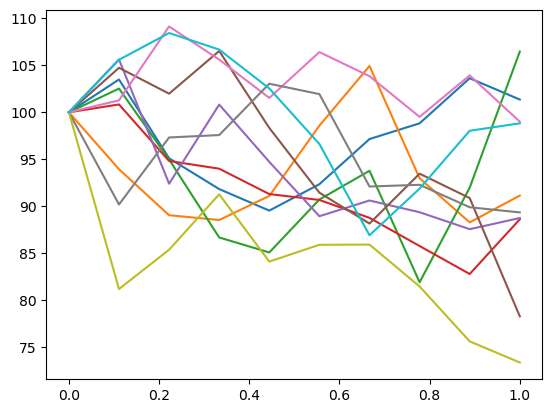

In [33]:
paths = path_gen.generate(n_path)
for i in range(n_path):
    plt.plot(grids, paths[i])